In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


In [58]:
(X_train, _),(X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 85s 1ms/step - loss: 0.2782 - val_loss: 0.1919
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1722 - val_loss: 0.1544
Epoch 3/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1451 - val_loss: 0.1344
Epoch 4/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1287 - val_loss: 0.1211
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1179 - val_loss: 0.1124
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1107 - val_loss: 0.1066
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1056 - val_loss: 0.1024
Epoch 8/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.0992 - val_loss: 0.0969
Epoch

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [2]:
#Deep Autoencoder
# layers = [784, 512, 256, 128, 64, 32]
def make_deep_encoder(layers):
    input_img = Input(shape=(layers[0],))
    encoded = input_img
    
    for layer in layers[1:]:
        encoded = Dense(layer, activation='relu')(encoded)
    
    decoded = encoded
    for layer in layers[::-1][1:-1]:
        decoded = Dense(layer, activation='relu')(decoded)
    decoded = Dense(layers[0], activation='sigmoid')(decoded)

    return Model(input_img, decoded)

In [3]:
layers = [784, 512, 256, 128, 64, 32]
deep_autoencoder = make_deep_encoder(layers)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [27]:
deep_autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.2331 - val_loss: 0.1676
Epoch 2/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1492 - val_loss: 0.1364
Epoch 3/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1323 - val_loss: 0.1262
Epoch 4/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.1233 - val_loss: 0.1197
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1176 - val_loss: 0.1142
Epoch 6/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1133 - val_loss: 0.1112
Epoch 7/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1095 - val_loss: 0.1080
Epoch 8/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1064 - val_loss: 0.1056
Epoch 9/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1037 - val_loss: 0.1029
Epoch

In [37]:
def plot_encode_pair(ae, n=20):
    decoded_imgs = ae.predict(X_test)
    plt.figure(figsize=(50, 10))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

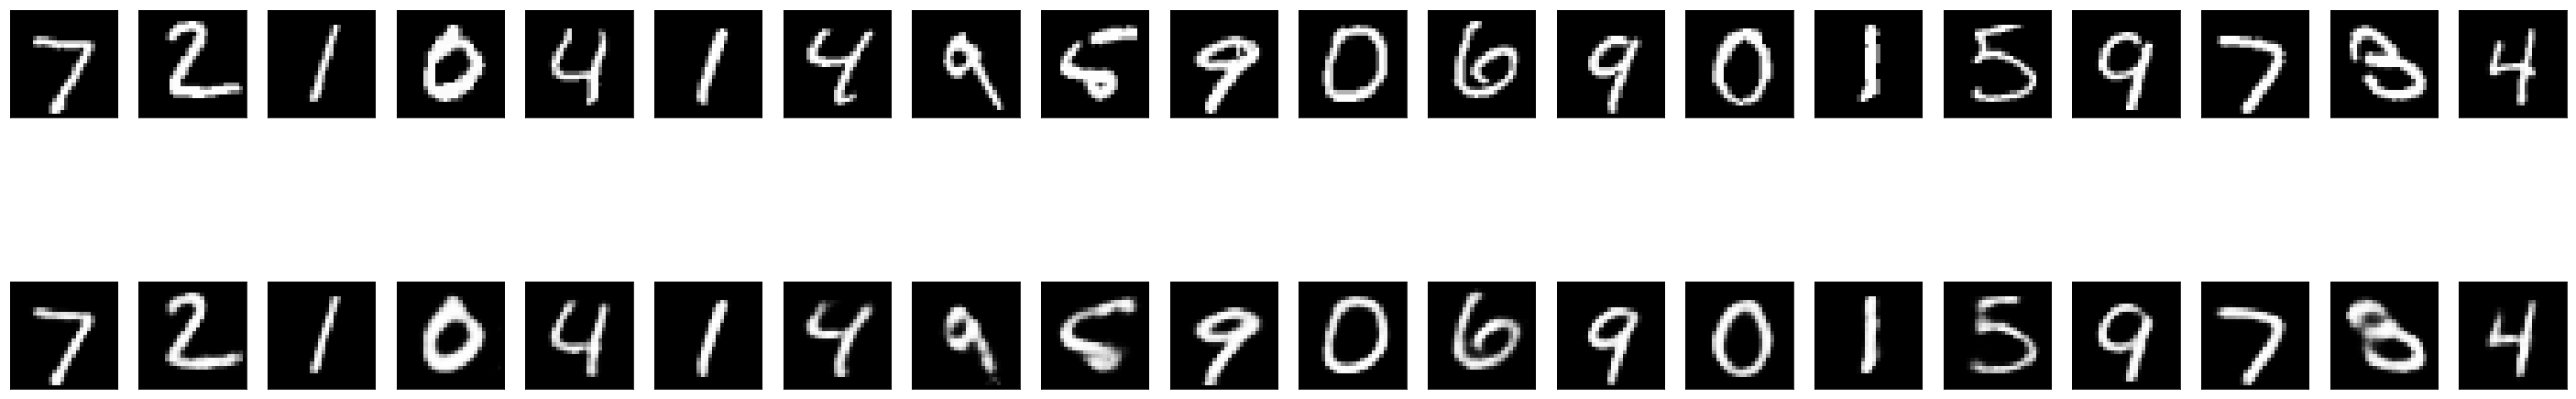

In [38]:
plot_encode_pair(deep_autoencoder, n=20)

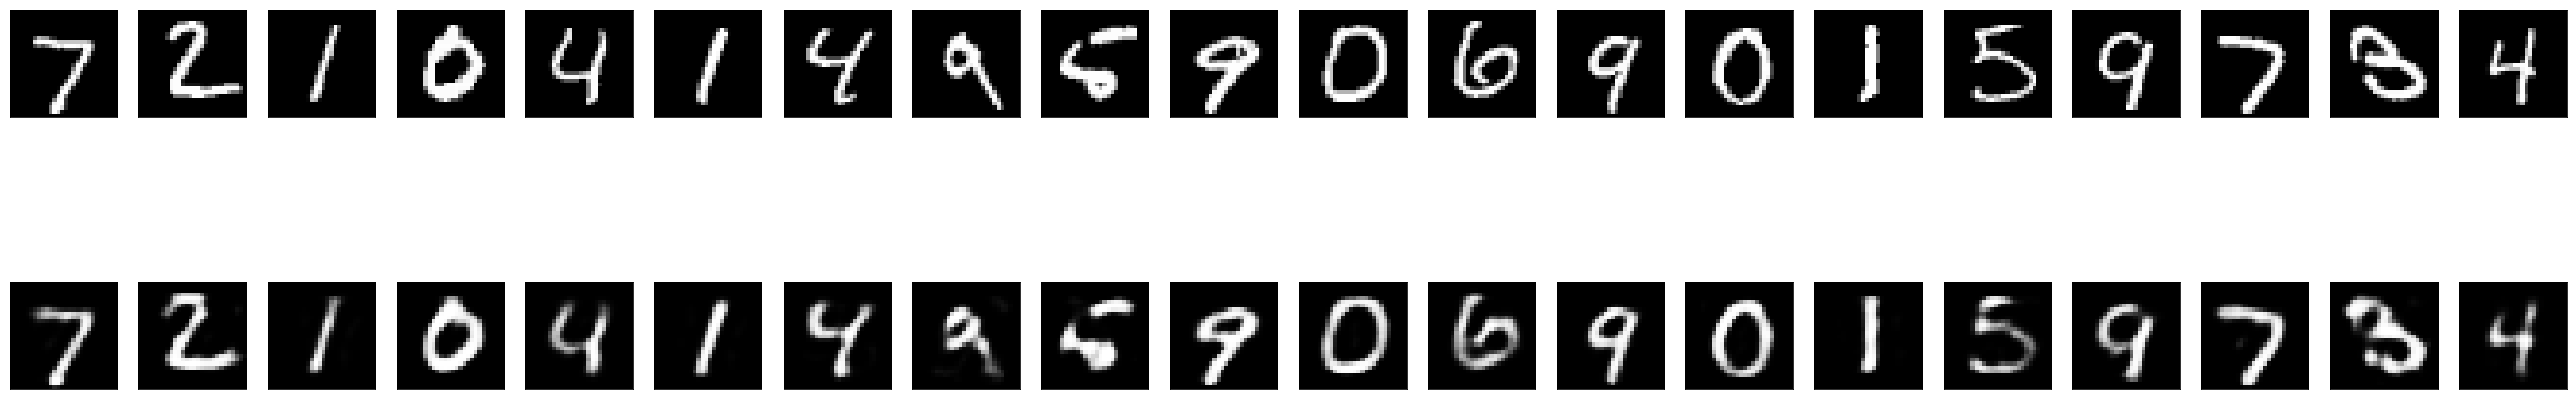

In [39]:
plot_encode_pair(autoencoder, n=20)

In [41]:
def get_encoder(autoencoder):
    layers = autoencoder.layers
    
                                        
    return encoder

In [8]:
deep_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
__________

In [54]:
class Autoencoder(object):
    def __init__(self, layers):
        self.layers = layers
        self.model = None
        self.encoder = None
        self.decoder = None
        
    def get_model(self):
        if self.model is None:
            input_img = Input(shape=(self.layers[0],))
            encoded = input_img

            for layer in self.layers[1:]:
                encoded = Dense(layer, activation='relu')(encoded)

            decoded = encoded
            for layer in self.layers[::-1][1:-1]:
                decoded = Dense(layer, activation='relu')(decoded)
            decoded = Dense(self.layers[0], activation='sigmoid')(decoded)

            self.model = Model(input_img, decoded)
            
        return self.model
    
    def get_encoder(self):
        if self.encoder is None:
            try:
                ae_layers = self.model.layers
            except AttributeError:
                print("Oops! 'NoneType' object has no attribute 'layers'. Get the autoencoder model first!")
                return
            input_img = Input(shape=(self.layers[0],))
            encoded = input_img
            

            for i in range(1,len(self.layers)):
                encoded = ae_layers[i](encoded)

            self.encoder = Model(input_img, encoded)
            
        return self.encoder
    
    def get_decoder(self):
        if self.decoder is None:
            try:
                ae_layers = self.model.layers
            except AttributeError:
                print("Oops! 'NoneType' object has no attribute 'layers'. Get the autoencoder model first!")
                return
            
            encoded_input = Input(shape=(self.layers[-1],))
            
            decoded = encoded_input
            
            for i in range(1-len(self.layers),0):
                decoded = ae_layers[i](decoded)
            
            self.decoder = Model(encoded_input, decoded)
            
        return self.decoder

In [55]:
layers = [784, 512, 256, 128, 100, 50, 32]
deep_autoencoder = Autoencoder(layers)

In [57]:
deep_autoencoder.get_model().compile(optimizer='adam', loss='binary_crossentropy')

In [59]:
deep_autoencoder.get_model().fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 194us/step - loss: 0.2581 - val_loss: 0.2117
Epoch 2/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1746 - val_loss: 0.1547
Epoch 3/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1483 - val_loss: 0.1426
Epoch 4/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1382 - val_loss: 0.1335
Epoch 5/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1311 - val_loss: 0.1290
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1264 - val_loss: 0.1241
Epoch 7/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1222 - val_loss: 0.1201
Epoch 8/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.1194 - val_loss: 0.1180
Epoch 9/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1174 - val_loss: 0.1185
Epo

In [60]:
def plot_encode_pair(ae, n=20):
    encoded_imgs = ae.get_encoder.predict(X_test)
    decoded_imgs = ae.get_decoder.predict(encoded_imgs)
    plt.figure(figsize=(50, 10))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
plot